<a href="https://colab.research.google.com/github/veropetit/PHYS633-S2022/blob/main/L05-MeanMolecularWeight/05-MeanMolecularWeight-template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='purple'>05-MeanMolecularWeight</font> (template)

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

## 1. In class: Solar abundances

In the 05-Grevesse.txt file, you will find a tabulation of the solar abundances for the first 30 elements that looks like this:

<div style="width:600px;height:200px;padding:2px;border:1px dotted black;">
<PRE> 
# Abundance from Grevesse					
Z   A       Element   NumberFraction    logAbund    X
1   1.0079  H         1.00E+00          1.20E+01    7.04E-01
2   4.0026  He        1.00E-01          1.10E+01    2.80E-01
3   6.941   Li        1.26E-11          1.10E+00    6.10E-11
4   9.0122  Be        2.51E-11          1.40E+00    1.58E-10
....
</PRE>
</div>

### a. We will first learn how to read in a data file, using a Numpy function

In [4]:
# If using "S8" for the element string, 
# numpy will use bytestring, which need to be decoded
# before using in mathplotlib -- using U8 here instead
url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L05-MeanMolecularWeight/05-Grevesse.txt'
#---------------------------------------
#---------------------------------------
cols = np.array([1,2,3,4,5,6])-1
dtype="i8,f8,|U8,f8,f8,f8"

AbundSol = np.genfromtxt(url, skip_header=1, names=True, usecols=cols, dtype=dtype)

print (AbundSol.dtype)
print (AbundSol['Element'])
print (AbundSol['Element'][0])



[('Z', '<i8'), ('A', '<f8'), ('Element', '<U8'), ('NumberFraction', '<f8'), ('logAbund', '<f8'), ('X', '<f8')]
['H' 'He' 'Li' 'Be' 'B' 'C' 'N' 'O' 'F' 'Ne' 'Na' 'Mg' 'Al' 'Si' 'P' 'S'
 'Cl' 'Ar' 'K' 'Ca' 'Sc' 'Ti' 'V' 'Cr' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zn']
H


### b. Now let's see what the abundance pattern looks like

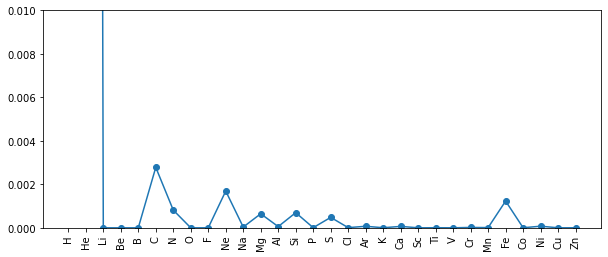

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
ax.set_ylim(0,0.01)

#---------------------------------------
#---------------------------------------
ax.scatter(AbundSol['Z'], AbundSol['X'])
ax.plot(AbundSol['Z'], AbundSol['X'])

t = ax.set_xticks(AbundSol['Z'])
l = ax.set_xticklabels(AbundSol['Element'], rotation = 90)



## 2. In class: what is the mean molecular weight for solar abundance?

Let's calculate the value for the mean molecular weight using the $X_i$ in our abundance table. 

We found that:

$$ \frac{1}{\mu} = \frac{1}{\mu_\mathrm{ion}} + \frac{1}{\mu_\mathrm{e}},$$
with

$$ \frac{1}{\mu_\mathrm{ion}} = \sum_i \frac{X_i}{A_i}$$

and

$$ \frac{1}{\mu_\mathrm{e}} = \sum_i \frac{Z_i X_i}{A_i} y_i $$

Let's consider two cases:


In [7]:
#---------------------------------------
#---------------------------------------
# Neutral Particles

mu_ion = 1.0/np.sum(AbundSol['X']/AbundSol['A'])
print ('For neutral Solar abundances, mu =', mu_ion)

mu_e = 1.0/np.sum(AbundSol['X']*AbundSol['Z']/AbundSol['A'])
print ('The electron mu, mu =', mu_e)

mu_total = 1.0/(1.0/mu_ion+1.0/mu_e)
print ('The ionized mu =', mu_total)

#Using X and Y
X = AbundSol['X'][0]
Y = AbundSol['X'][1]

mu_ion_2 = 1.0/(X+0.25*Y)
print ('Using X and Y, for neutral Solar abundances, mu =', mu_ion_2)

mu_e_2 = 2.0/(X+1.0)
print ('Using X and Y, the electron mu, mu =', mu_e_2)

mu_total_2 = 1.0/(1.0/mu_ion_2+1.0/mu_e_2)
print ('Using X and Y, the ionized mu =', mu_total_2)



For neutral Solar abundances, mu = 1.3005465793861997
The electron mu, mu = 1.1867069514286983
The ionized mu = 0.6205107952580795
Using X and Y, for neutral Solar abundances, mu = 1.2919896640826873
Using X and Y, the electron mu, mu = 1.1737089201877935
Using X and Y, the ionized mu = 0.6150061500615006


## 3. At home: What will $\mu$ be at the center of the Sun once all the H is converted into He?

> **TODO**: Make a calulation of the mean molecular weight in the core of the Sun, once all of the hydrogen has been converted into helium (remember, at the surface of the Sun where there is no nuclear reactions: $X$=70%, $Y$=28%, and $Z$=2%)
>
> You can use the approximations I gave in the last slide of the PDF class notes
>
> You can use the code cell below as a calculator, or you can do the calculation by hand.


At the center of the Sun, let's assume that everything is ionized. 

I will also assume that the total mass of the hydrogen was converted into the new total mass of helium (which is not exactly true, as a small fraction of that mass get converted into energy!)

Therefore Y will become X, and X will become zero.

In [9]:
#---------------------------------------
#---------------------------------------
X = 0
Y = 1

mu_ion = 1.0/(X+0.25*Y)
print ('Using X and Y, for neutral Solar abundances, mu =', mu_ion)

mu_e = 2.0/(X+1.0)
print ('Using X and Y, the electron mu, mu =', mu_e)

mu_total = 1.0/(1.0/mu_ion+1.0/mu_e)
print ('Using X and Y, the ionized mu =', mu_total)


Using X and Y, for neutral Solar abundances, mu = 4.0
Using X and Y, the electron mu, mu = 2.0
Using X and Y, the ionized mu = 1.3333333333333333


## 4. At home: Finally, let's check what the mean molecular weight looks like inside of the sun

### a. Let's use the MESA model to look at $\mu$ as a function of radius inside of the Sun.

> **TODO**: Based on the MESA model for the Sun, I provide an array `mu` that contains the mean molecular weigth. Create a plot of the mean molecular weight as a function of $r/R_\star$. The corresponding array for the $r/R_\star$ is called `r_rs`

### b. In the interpretation, explain the shape of the curve

You might find it interesting to look at the variation of the temperature `data['logT']` to help you with your interpretation -- you might find it enlightening!


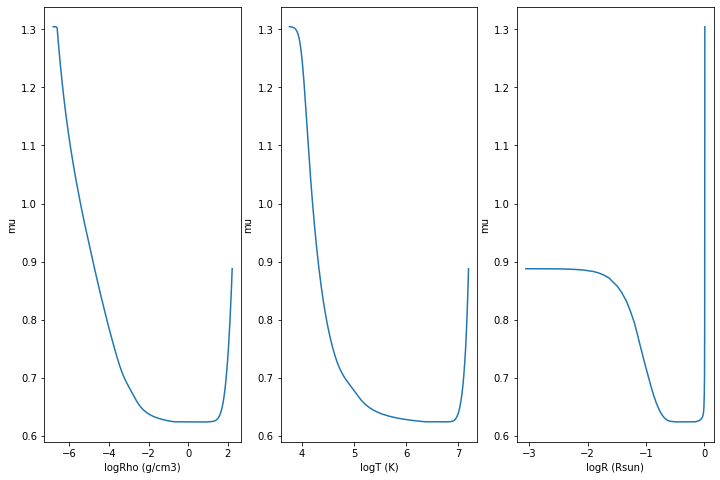

In [21]:
def read_model(file):
    # Here's a function that reads it the MESA model.
    cols = np.array([1,2,3,4,5,9,29,66])-1
    return np.genfromtxt(file, skip_header=5, names=True, usecols = cols)
# Reading the model
data = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L05-MeanMolecularWeight/05-MESAdatafile.txt')

# Calculating mu using the density (in cgs), the temperature (in K) and the gas pressure 
mu = 10**data['logRho'] * u.g / u.cm**3 * const.k_B * 10**data['logT'] * u.K / (10**data['logPgas']*u.Ba) / const.u
mu = mu.decompose() # Should be unitless.

r_rs = 10**(data['logR']-data['logR'][0])

#---------------------------------------
#---------------------------------------
fig, ax = plt.subplots(1, 3, figsize=(12,8))

ax[0].set_xlabel('logRho (g/cm3)')
ax[0].set_ylabel('mu')
ax[0].plot(data['logRho'],mu)
ax[1].set_xlabel('logT (K)')
ax[1].set_ylabel('mu')
ax[1].plot(data['logT'],mu)
ax[2].set_xlabel('logR (Rsun)')
ax[2].set_ylabel('mu')
ax[2].plot(data['logR'],mu)



